***
<pre>                                                 <i> Linear Regression <i></pre>
***
</div>
    <img src="INSEA_logo.png"  style="height: 80px;: 20px;">
</div>

<div style="background-color: green">
<h1 align="center"> Simple Linear Regression from Scratch </h1>
</div>

<pre align='left'>  18/04/2025                                                                                         <i> Author: DAOUDI Adam </i></pre>


____________________________________________________________________________________________________________________________________________________________

#### objectifs :
- Implémenter l'algorithme de base 
- Prédictions et évaluation simple 
- Visualisation de résultats 
- Comparaison avec avec scikit-learn 
- Résolution du problème d'overfitting : méthodologie et résultats

<div >
<h1 align="left"> I.Simple Linear Regression from Scratch </h1>
</div>

#### 1.Required Imports and visualizations 

In [23]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, precision_score, f1_score


In [24]:
df=pd.read_csv("Salary_dataset.csv")

In [25]:
df.describe()

,Unnamed: 0,YearsExperience,Salary
count,30.000000,30.000000,30.000000
mean,14.500000,5.413333,76004.000000
std,8.803408,2.837888,27414.429785
min,0.000000,1.200000,37732.000000
25%,7.250000,3.300000,56721.750000
50%,14.500000,4.800000,65238.000000
75%,21.750000,7.800000,100545.750000
max,29.000000,10.600000,122392.000000


In [26]:
df.isnull().sum().max()

0

In [27]:
df.columns

Index(['Unnamed: 0', 'YearsExperience', 'Salary'], dtype='object')

In [28]:
df.info

<bound method DataFrame.info of     Unnamed: 0  YearsExperience    Salary
0            0              1.2   39344.0
1            1              1.4   46206.0
2            2              1.6   37732.0
3            3              2.1   43526.0
4            4              2.3   39892.0
5            5              3.0   56643.0
6            6              3.1   60151.0
7            7              3.3   54446.0
8            8              3.3   64446.0
9            9              3.8   57190.0
10          10              4.0   63219.0
11          11              4.1   55795.0
12          12              4.1   56958.0
13          13              4.2   57082.0
14          14              4.6   61112.0
15          15              5.0   67939.0
16          16              5.2   66030.0
17          17              5.4   83089.0
18          18              6.0   81364.0
19          19              6.1   93941.0
20          20              6.9   91739.0
21          21              7.2   98274.0
22

In [29]:
X=df['YearsExperience']
y = df['Salary']

print(f"dataset loaded: {df.shape[0]} rows and {df.shape[1]} columns ")

print('\n Duplicate rows',df.duplicated().sum())



dataset loaded: 30 rows and 3 columns 

 Duplicate rows 0


#### 2.Code Implimenation

In [30]:
class SimpleLinearRegression :
    def __init__(self):
        self.b0= 0.0
        self.b1= 0.0 


    def fit(self,X, y):

        x=np.array(X).flatten()
        y=np.array(y).flatten()
        mean_X = np.mean(X)
        mean_y= np.mean(y)

        numerator = np.sum((X - mean_X)*(y - mean_y))
        denominator = np.sum((X - mean_X)**2)

        self.b1 = numerator/denominator if denominator !=0 else 0.0
        self.b0 = mean_y - (self.b1 * mean_X)


    def predict(self, X):
        return self.b0 +self.b1 * np.array(X)
    


X = df['YearsExperience'].values
y = df['Salary'].values


regressor = SimpleLinearRegression()
regressor.fit(X, y) 
y_pred_scratch = regressor.predict(X)

In [31]:
def calculate_r2(y_true, y_pred):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    SCR = np.sum((y_true - y_pred) ** 2)
    SCT = np.sum((y_true - np.mean(y_true)) ** 2)
    return 1 - (SCR / SCT) if SCT != 0 else 0.0


r2_scrath = calculate_r2(y, y_pred_scratch)

print(f'R² score is {r2_scrath*100:.4f}% ')

R² score is 95.6957% 


<div style= "background-color:green">
<hi align="left" >Comment : Excellent! Explains 95.70% of salary variance.</hi>
</div>

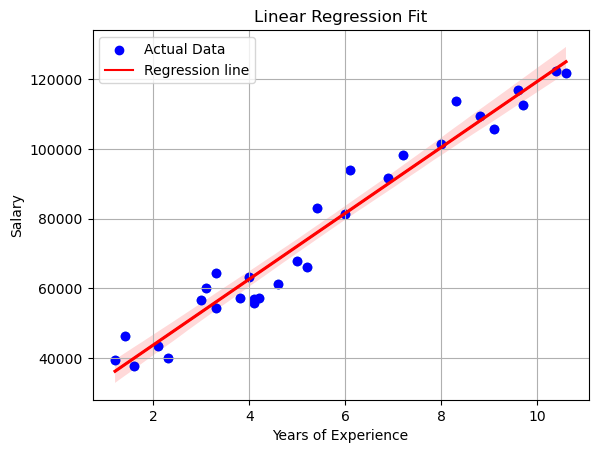

In [32]:
sns.regplot(x=df['YearsExperience'], y=df['Salary'], line_kws={"color": "red"})
plt.scatter(X, y , color='blue', label="Actual Data ")
plt.plot(X, y_pred_scratch, color='red', label='Regression line')
plt.title("Linear Regression Fit")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.grid(True)
plt.legend()
plt.show()

#### 3.make some predictions 

In [33]:
def calculate_predicted_salary(years_experience ):
    return regressor.b0 + regressor.b1*years_experience

In [34]:
years_experience = 9.0
predicted_salary_value= calculate_predicted_salary(years_experience)
print(f'\npredicted Salary for {years_experience} years of expericne is {predicted_salary_value:.2f}$')


predicted Salary for 9.0 years of expericne is 109897.86$


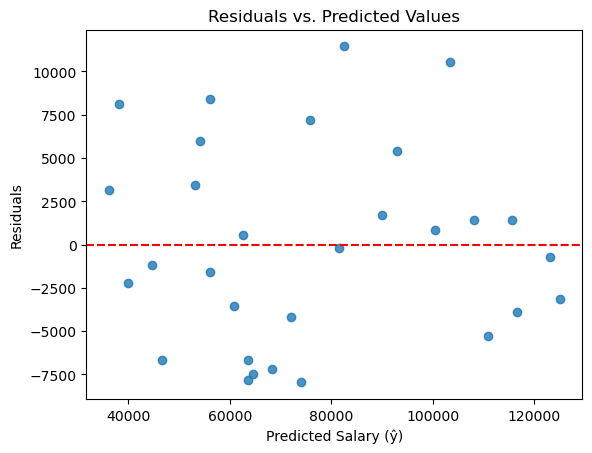

In [35]:
y_pred_scratch = regressor.predict(X)
residuals = [yi - ypi for yi, ypi in zip(y, y_pred_scratch)]
  

sns.residplot(x=y_pred_scratch, y=residuals, lowess=False, line_kws={"color": "red"})
plt.title("Residuals vs. Predicted Values")
plt.xlabel("Predicted Salary (ŷ)")
plt.ylabel("Residuals")
plt.axhline(y=0, color='red', linestyle='--')
plt.show()

<div style= "background-color:green">
<hi align="left" >La dispersion des résidus semble aléatoire autour de zéro, sans motif systématique (ex: éventail ou regroupement). La variance des résidus reste approximativement constante sur l’ensemble des salaires prédits, ce qui valide l’hypothèse d’homoscédasticité. Le modèle est donc approprié pour des analyses statistiques rigoureuses.</hi>
</div>

<div style= "background-color:red">
<hi align="left" >Note : Une fuite de données (data leakage) pourrait survenir dans cette implémentation, conduisant potentiellement à du surapprentissage (overfitting). Nous corrigerons ce problème ultérieurement en isolant proprement les ensembles d'entraînement et de test..</hi>
</div>

<div >
<h1 align="left"> II.Simple Linear Regression with scikit-learn </h1>
</div>

#### 1.Required Imports 

In [36]:
from sklearn.metrics import mean_squared_error , r2_score
from sklearn.model_selection import  train_test_split
from sklearn.linear_model import  LinearRegression

#### 2.Data Train and Test

In [37]:
X = df['YearsExperience']
y= df['Salary']

X_train , X_test , y_train , y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape , X_test.shape
X_train= X_train.values
X_test= X_test.values

In [38]:
model = LinearRegression()
model.fit(X_train.reshape(-1, 1), y_train)

y_pred= model.predict(X_test.reshape(-1, 1))

In [39]:

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)


print(f"R² Score: {r2*100:.4f} %")
print(f"MSE: {mse:.4f}")

R² Score: 90.2446 %
MSE: 49830096.8559


<div style= "background-color:green">
<hi align="left" >Comment : Excellent! Explains 90.24% of salary variance.</hi>
</div>

#### 3.Make some predictions

In [40]:
# exemple :

new_experience =[[ 10]]
predicted_salary = model.predict(new_experience)
print(f'predicted salary {predicted_salary.item():.2f}$')

predicted salary 118618.35$


#### 4.From-Scratch Model vs. Scikit-Learn

##### 4.1 coefficient de regression / R²

In [41]:
print("From Scratch :", [regressor.b0, regressor.b1])  
print("Scikit-Learn :", model.intercept_, model.coef_)  

From Scratch : [24848.2039665232, 9449.962321455076]
Scikit-Learn : 24380.20147947369 [9423.81532303]


In [42]:
# Comparer R²
print(f'R² score from scrath : {r2_scrath*100:.4f}%')
print(f'R² score from scikit learn model : {r2*100:.4f}%')

R² score from scrath : 95.6957%
R² score from scikit learn model : 90.2446%


<div style= "background-color:green">
<hi align="left" >La différence entre le R² du modèle from scratch (95.7%) et celui de scikit-learn (90.2%) indique une fuite de données (data leakage). Le modèle personnalisé évalue ses performances sur l'ensemble des données (entraînement + test), ce qui fausse les métriques en masquant le surapprentissage (overfitting).</hi>
</div>

#### 4.2 Correction :

In [43]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

class SimpleLinearRegression:
    def __init__(self):
        self.b0 = 0.0
        self.b1 = 0.0

    def fit(self, X_train, y_train):
        X_mean = np.mean(X_train)
        y_mean = np.mean(y_train)
        
        numerator = np.sum((X_train - X_mean) * (y_train - y_mean))
        denominator = np.sum((X_train - X_mean) ** 2)
        
        self.b1 = numerator / denominator if denominator != 0 else 0.0
        self.b0 = y_mean - self.b1 * X_mean

    def predict(self, X):
        return self.b0 + self.b1 * X


X = df['YearsExperience'].values
y = df['Salary'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scrath_model = SimpleLinearRegression()
scrath_model.fit(X_train, y_train)
y_pred_scratch = scrath_model.predict(X_test)

# Calcul R² corrigé avec y_train.mean()
SCR_scratch = np.sum((y_test - y_pred_scratch) ** 2)
SCT_scratch = np.sum((y_test - np.mean(y_train)) ** 2)
r2_corrige= 1 - (SCR_scratch / SCT_scratch)



# Affichage des résultats
print(f"R² scratch (corrigé): {r2_corrige*100:.4f}%")
print(f"R² Scikit-Learn: {r2*100:.4f}%")        
print(f"Coef scratch: {scrath_model.b1:.2f}")    
print(f"Coef Sklearn: {model.coef_[0]:.2f}") 

R² scratch (corrigé): 91.5739%
R² Scikit-Learn: 90.2446%
Coef scratch: 9423.82
Coef Sklearn: 9423.82
